Clusterização
* agrupamento por consumo de energia elétrica

[dataset](https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('dados/household_power_consumption.txt', delimiter = ';', low_memory = False)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.shape

(2075259, 9)

In [5]:
df.isnull().values.sum()

25979

In [6]:
df = df.iloc[0:, 2:9].dropna()
df.isnull().values.sum()

In [8]:
# Obtém os valores dos atributos 
df_atrib = df.values


array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       ['0.938', '0.000', '239.820', ..., '0.000', '0.000', 0.0],
       ['0.934', '0.000', '239.700', ..., '0.000', '0.000', 0.0],
       ['0.932', '0.000', '239.550', ..., '0.000', '0.000', 0.0]],
      dtype=object)

In [22]:
# Coleta uma amostra de 1% dos dados para não comprometer a memória do computador
amostra1, amostra2 = train_test_split(df.values, train_size = .01)
amostra1.shape

(20492, 7)

Text(0, 0.5, 'Inertia')

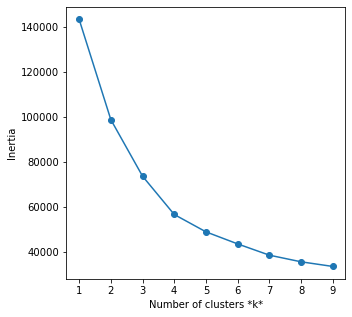

In [23]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler() 
X_std =scaller.fit_transform(amostra1)

inertias = [] 
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)
plt.figure(figsize=(5,5))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia')

In [24]:
# Aplica redução de dimensionalidade
pca = PCA(n_components = 2).fit_transform(amostra1)


In [25]:
# Criando um modelo com K = 8
modelo_v1 = KMeans(n_clusters = 8)
modelo_v1.fit(pca)

KMeans()

In [26]:
# Coletando labels, centróides e número de clusters
labels = modelo_v1.labels_
cluster_centers = modelo_v1.cluster_centers_
n_clusters_ = len(np.unique(labels))

# Print
print(cluster_centers)
print("Número Estimado de Clusters:", n_clusters_)

[[11.02885313 -5.49651005]
 [-6.70168797  0.74693151]
 [ 8.32379814 31.3695196 ]
 [24.73829739 24.09438371]
 [ 2.91123761 17.51205497]
 [19.69744789 11.31360782]
 [32.05312798 44.27917054]
 [ 3.54149642 -3.19941615]]
Número Estimado de Clusters: 8


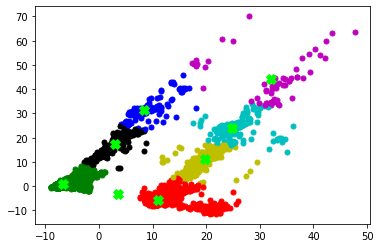

In [27]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.','black']

for i in range(len(pca)):
    plt.plot(pca[i][0], pca[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = "x", color = 'lime', s = 60, linewidths = 5, zorder = 10)
plt.show()


In [28]:
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.791904592332794

#### Criando o Cluster Map com os clusters do Modelo V1 que apresentou melhor Silhouette Score.

In [30]:
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Cluster map
cluster_map = pd.DataFrame(amostra1, columns = names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = modelo_v1.labels_
cluster_map

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,2.848,0.182,239.690,11.800,0.000,1.000,19.0,0
1,0.678,0.056,238.890,4.200,0.000,0.000,0.0,1
2,3.656,0.178,237.060,15.400,0.000,1.000,0.0,1
3,4.104,0.106,236.430,17.200,0.000,1.000,17.0,0
4,0.452,0.118,247.370,1.800,0.000,0.000,1.0,1
...,...,...,...,...,...,...,...,...
20487,0.288,0.000,241.180,1.400,0.000,0.000,1.0,1
20488,1.766,0.222,241.220,7.200,0.000,2.000,18.0,0
20489,0.320,0.120,244.190,1.400,0.000,2.000,0.0,1
20490,1.496,0.000,244.090,6.000,0.000,0.000,18.0,0


In [33]:
# Média de consumo de energia por cluster
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    1.840724
1    0.508984
2    3.427899
3    4.446201
4    2.520208
5    3.699461
6    6.503967
7    1.121394
Name: Global_active_power, dtype: float64

Os clientes do cluster 2 e 5 consome em media uma quantidade maior de energia elétrica.